In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

## Spatial Disparity

In [2]:
# Audio bias of HC
HC_bias_a = np.zeros((3, 8))
# HC_bias_a[0]--High; HC_bias_a[1]--Medium; HC_bias_a[2]--Low
HC_bias_a[0] = np.array(
    [
        -5.21640112246667,
        -4.18706601266667,
        -3.13696911613333,
        -2.09924748133333,
        1.35796414540000,
        3.07563797893333,
        3.81842299133333,
        3.35914483333333,
    ]
)
HC_bias_a[1] = np.array(
    [
        -4.65343309471429,
        -5.46053503785714,
        -2.09086371792857,
        -1.13832656671429,
        -0.277120626642857,
        0.262638716714286,
        2.19984634542857,
        3.40839929092857,
    ]
)
HC_bias_a[2] = np.array(
    [
        -2.93714767620000,
        -2.81604437300000,
        -1.61590862560000,
        -1.98143368426667,
        -1.29873315480000,
        0.0165255805333333,
        0.501353158466667,
        1.16135676946667,
    ]
)

In [3]:
# Causal Inference of HC
HC_pro_com = np.array(
    [
        [
            0.367025484375000,
            0.682562911541667,
            0.822405755208334,
            0.876760716875000,
            0.863113007208333,
            0.809197201583333,
            0.649743997500000,
            0.321256356083333,
        ],
        [
            0.435277895916667,
            0.621660267583333,
            0.659722209500000,
            0.704617010791667,
            0.724928494125000,
            0.687408309375000,
            0.612227719333333,
            0.446587043833333,
        ],
        [
            0.519254406291667,
            0.624221809791667,
            0.623241935666667,
            0.633213512666667,
            0.650625944875000,
            0.645931453375000,
            0.608952192000000,
            0.537992153875000,
        ],
    ]
)

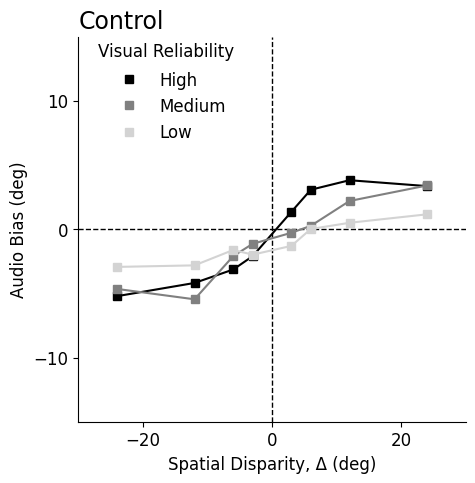

In [4]:
dis = np.array([-24, -12, -6, -3, 3, 6, 12, 24])  # disparities
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.spines[["top", "right"]].set_visible(False)
plt.axvline(0, ls="--", c=colors["black"], linewidth=1.0)
plt.axhline(0, ls="--", c=colors["black"], linewidth=1.0)
plt.plot(dis, HC_bias_a[0], "s", color=colors["black"], label="High")
plt.plot(dis, HC_bias_a[0], color=colors["black"])
plt.plot(dis, HC_bias_a[1], "s", color=colors["grey"], label="Medium")
plt.plot(dis, HC_bias_a[1], color=colors["grey"])
plt.plot(dis, HC_bias_a[2], "s", color=colors["lightgrey"], label="Low")
plt.plot(dis, HC_bias_a[2], color=colors["lightgrey"])
plt.annotate(
    "Visual Reliability", xy=(0.05, 0.95), xycoords="axes fraction", fontsize=12
)

plt.title("Control", loc="left", color=colors["black"], fontsize=17)
plt.xlabel("Spatial Disparity, Δ (deg)", fontsize=12)
plt.ylabel("Audio Bias (deg)", fontsize=12)
plt.xlim(-30, 30)
plt.ylim(-15, 15)
plt.xticks([-20, 0, 20], fontsize=12)
plt.yticks([-10, 0, 10], fontsize=12)
plt.legend(bbox_to_anchor=(0.05, 0.95), loc="upper left", frameon=False, fontsize=12)
plt.show()

## Temporal Disparity

In [5]:
from skneuromsi.sweep import ProcessingStrategyABC

## TEMPORAL DATA

temporal_causes_data = np.array(
    [
        0.03154762,
        0.03214286,
        0.07619048,
        0.19699793,
        0.30345238,
        0.50193093,
        0.72754579,
        0.82582418,
        0.90882784,
        0.93468864,
        0.97271062,
        #    0.97710623,
        0.95398352,
        0.94500916,
        0.94871795,
        0.94787546,
        0.92052078,
        0.87787546,
        0.75857143,
        0.51714286,
        0.33121212,
        0.05779221,
        0.02836439,
    ]
)

temporal_causes_data_short = np.append(
    temporal_causes_data[5:-3:2], temporal_causes_data[-4]
)


class CausesProcessingStrategy(ProcessingStrategyABC):
    def map(self, result):
        causes = result.causes_
        del result._nddata
        return causes

    def reduce(self, results, **kwargs):
        return np.array(results, dtype=np.float16)

In [6]:
from skneuromsi.sweep import ParameterSweep
from skneuromsi.neural import Cuppini2017
from skneuromsi.neural import Paredes2022
from skneuromsi.mle import AlaisBurr2004
from skneuromsi.bayesian import Kording2007

# MODEL SETUP
model_alaisburr = AlaisBurr2004(position_range=(0, 90), position_res=1)
model_kording = Kording2007(position_range=(0, 90), position_res=1)
model_cuppini2017 = Cuppini2017(neurons=90, position_range=(0, 90), position_res=1)
model_paredes = Paredes2022(
    neurons=90, position_range=(0, 90), position_res=1, time_range=(0, 100)
)
causal_model_paredes = Paredes2022(
    neurons=90, position_range=(0, 90), position_res=1, time_range=(0, 150)
)

temporal_model_kording = Kording2007(
    time_range=(0, 500), time_res=1, position_range=(0, 1), position_res=1
)

temporal_model_cuppini2017 = Cuppini2017(
    neurons=10,
    position_range=(0, 10),
    position_res=1,
    time_range=(0, 500),
    tau=(5.361e01, 2.968e01, 2.087e00),
)

temporal_model_paredes = Paredes2022(
    neurons=10,
    position_range=(0, 10),
    position_res=1,
    time_range=(0, 700),
    tau=(3.745e01, 1.583e01, 4.112e01),
)

## SWEEP SETUP
dis = np.array([-24, -12, -6, -3, 3, 6, 12, 24])  # disparities
temporal_dis = (
    np.array(
        [
            -0.7,
            -0.5,
            -0.3,
            -0.25,
            -0.2,
            -0.15,
            -0.1,
            -0.08,
            -0.05,
            -0.02,
            -0.01,
            #    0.0,
            0.01,
            0.02,
            0.05,
            0.08,
            0.1,
            0.15,
            0.2,
            0.25,
            0.3,
            0.5,
            0.7,
        ]
    )
    * 1000
)

temporal_dis_short = np.append(temporal_dis[5:-3:2], temporal_dis[-4])

sp_alaisburr = ParameterSweep(
    model=model_alaisburr,
    target="visual_position",
    repeat=1,
    n_jobs=-2,
    range=45 + dis,
)

sp_kording = ParameterSweep(
    model=model_kording,
    target="visual_position",
    repeat=1,
    n_jobs=-2,
    range=45 + dis,
)

sp_cuppini2017 = ParameterSweep(
    model=model_cuppini2017,
    target="visual_position",
    repeat=1,
    n_jobs=-2,
    range=45 + dis,
)
sp_paredes = ParameterSweep(
    model=model_paredes,
    target="visual_position",
    repeat=1,
    n_jobs=-2,
    range=45 + dis,
)

causal_sp_kording = ParameterSweep(
    model=model_kording,
    target="visual_position",
    repeat=1,
    n_jobs=-2,
    range=45 + dis,
    processing_strategy=CausesProcessingStrategy(),
)

causal_sp_cuppini2017 = ParameterSweep(
    model=model_cuppini2017,
    target="visual_position",
    repeat=1,
    n_jobs=-2,
    range=45 + dis,
    processing_strategy=CausesProcessingStrategy(),
)

causal_sp_paredes = ParameterSweep(
    model=causal_model_paredes,
    target="visual_position",
    repeat=1,
    n_jobs=-2,
    range=45 + dis,
    processing_strategy=CausesProcessingStrategy(),
)

temporal_causal_sp_kording = ParameterSweep(
    model=temporal_model_kording,
    target="auditory_position",
    repeat=1,
    n_jobs=-2,
    range=160 + temporal_dis_short,
    processing_strategy=CausesProcessingStrategy(),
)

temporal_sp_cuppini2017 = ParameterSweep(
    model=temporal_model_cuppini2017,
    target="auditory_onset",
    repeat=1,
    n_jobs=-2,
    range=160 + temporal_dis_short,
    processing_strategy=CausesProcessingStrategy(),
)

temporal_sp_paredes = ParameterSweep(
    model=temporal_model_paredes,
    target="auditory_onset",
    repeat=1,
    n_jobs=-2,
    range=160 + temporal_dis_short,
    processing_strategy=CausesProcessingStrategy(),
)

## BIAS
res_alaisburr = sp_alaisburr.run(
    auditory_position=45, auditory_sigma=4.695e01, visual_sigma=4.505e01, noise=False
)

res_kording = sp_kording.run(
    auditory_position=45,
    auditory_sigma=2.490e01,
    visual_sigma=2.171e01,
    prior_mu=4.069e01,
    prior_sigma=5.277e00,
    noise=False,
)

res_cuppini2017 = sp_cuppini2017.run(
    auditory_position=45,
    auditory_sigma=4.511e01,
    visual_sigma=2.495e01,
    auditory_intensity=1.191e01,
    visual_intensity=1.387e01,
    noise=False,
)
res_paredes = sp_paredes.run(
    auditory_position=45,
    auditory_sigma=2.000e01,
    visual_sigma=1.854e01,
    auditory_intensity=1.113e00,
    visual_intensity=7.728e00,
    noise=False,
    auditory_soa=None,
    auditory_stim_n=1,
    visual_stim_n=1,
    auditory_duration=100,
    visual_duration=100,
    auditory_onset=0,
    visual_onset=0,
)

## CAUSES
res_kording_causes = causal_sp_kording.run(
    auditory_position=45,
    auditory_sigma=8.042e00,
    visual_sigma=8.041e00,
    noise=False,
    strategy="selection",
    prior_mu=6.898e01,
    prior_sigma=4.501e01,
    causes_kind="prob",
)

res_cuppini2017_causes = causal_sp_cuppini2017.run(
    auditory_position=45,
    auditory_sigma=2.803e01,
    visual_sigma=8.033e00,
    auditory_intensity=1.328e01,
    visual_intensity=2.366e01,
    noise=False,
    causes_kind="prob",
    causes_dim="space",
)

res_paredes_causes = causal_sp_paredes.run(
    auditory_position=45,
    auditory_sigma=4.215e01,
    visual_sigma=1.673e01,
    auditory_intensity=2.698e01,
    visual_intensity=4.776e00,
    noise=False,
    causes_kind="prob",
    causes_dim="space",
    auditory_soa=None,
    auditory_stim_n=1,
    visual_stim_n=1,
    auditory_duration=150,
    visual_duration=150,
    auditory_onset=0,
    visual_onset=0,
    causes_peak_threshold=0.15,
)

## TEMPORAL CAUSES
temporal_res_cuppini2017_causes = temporal_sp_cuppini2017.run(
    auditory_intensity=50,
    visual_intensity=49,
    feedforward_weight=9.962e01,
    cross_modal_weight=1.112e01,
    noise=False,
    causes_kind="prob",
    causes_dim="time",
    auditory_stim_n=1,
    visual_stim_n=1,
    auditory_duration=6,
    visual_duration=6,
    visual_onset=160,
    causes_peak_threshold=0.10,
    causes_peak_distance=1600,
)

temporal_res_paredes_causes = temporal_sp_paredes.run(
    auditory_intensity=2.55,
    visual_intensity=2.5,
    feedforward_weight=5.613e00,
    cross_modal_weight=1.484e-01,
    feedback_weight=2.210e-03,
    noise=False,
    causes_kind="prob",
    causes_dim="time",
    auditory_soa=None,
    visual_soa=None,
    auditory_stim_n=1,
    visual_stim_n=1,
    auditory_duration=6,
    visual_duration=6,
    visual_onset=160,
    causes_peak_threshold=0.10,
    causes_peak_distance=1600,
    feed_latency=24,
)

temporal_res_kording_causes = temporal_causal_sp_kording.run(
    visual_position=160,
    auditory_sigma=5.489e01,
    visual_sigma=5.115e01,
    noise=False,
    prior_mu=1.364e01,
    prior_sigma=1.082e02,
    strategy="selection",
    causes_kind="prob",
    dimension="time",
)

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'auditory_onset':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'auditory_onset':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'auditory_position':   0%|          | 0/8 [00:00<?, ?it/s]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


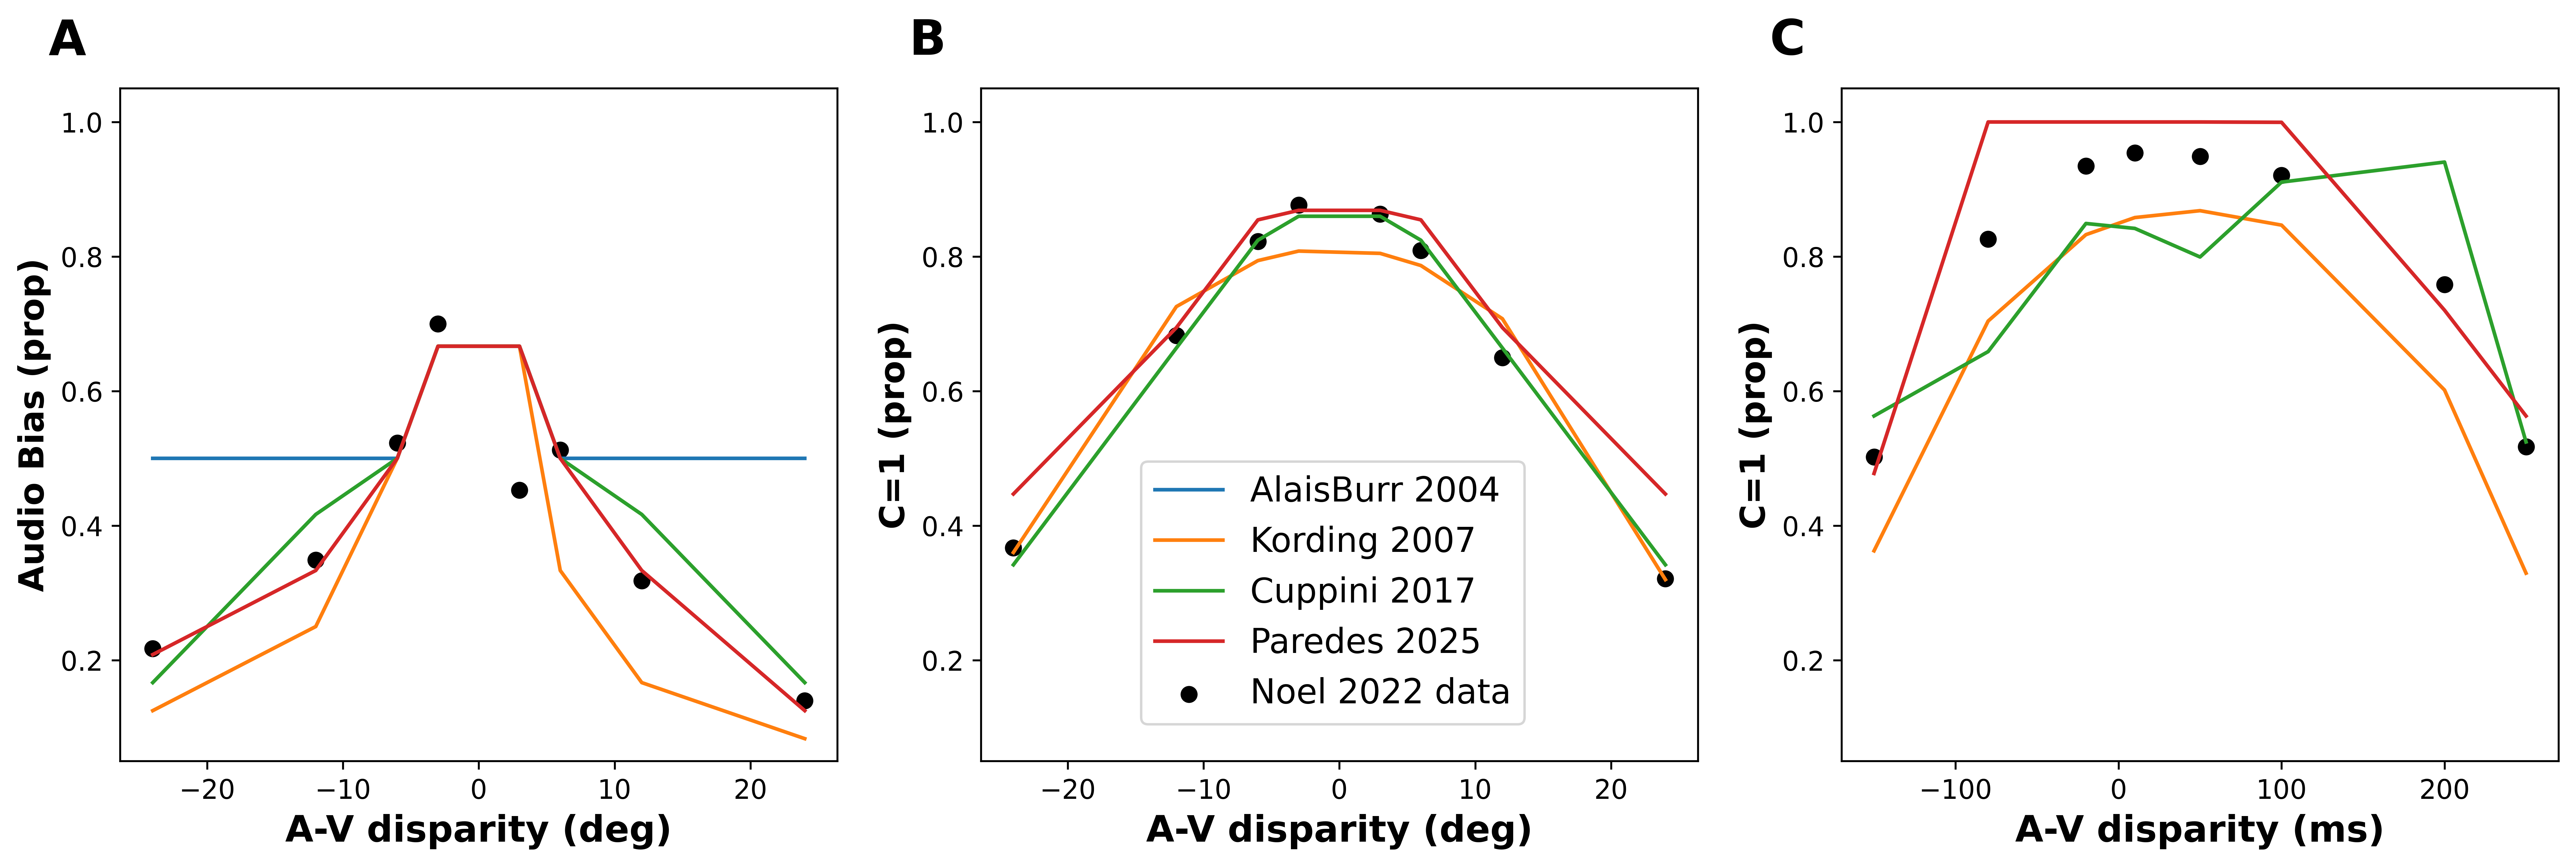

In [101]:
import string

# initializes figure and plots
fig, axs = plt.subplots(
    1, 3, figsize=(18, 5), sharex=False, dpi=600, gridspec_kw={"hspace": 0.3}
)

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
# cycler = plt.set_prop_cycler(None)

# Panel A
ax1 = plt.subplot(131)
bias_data = np.abs(HC_bias_a[0]) / np.abs(dis)
res_alaisburr.bias.bias_mean(
    influence_parameter="auditory_position", mode="multi"
).plot(ax=ax1)
res_kording.bias.bias_mean(
    influence_parameter="auditory_position", mode="auditory"
).plot(ax=ax1)
res_cuppini2017.bias.bias_mean(
    influence_parameter="auditory_position", mode="auditory"
).plot(ax=ax1)
res_paredes.bias.bias_mean(
    influence_parameter="auditory_position", mode="auditory"
).plot(ax=ax1)
ax1.scatter(dis, bias_data, c="k")
ax1.set_ylim(0.05, 1.05)
ax1.set_xlabel("A-V disparity (deg)", size=15, weight="bold")
ax1.set_ylabel("Audio Bias (prop)", size=14, weight="bold")
ax1.tick_params(axis="both", labelsize=11)
ax1.text(
    -0.1,
    1.05,
    string.ascii_uppercase[0],
    transform=ax1.transAxes,
    size=20,
    weight="bold",
)
legend = ax1.legend(
    [
        "AlaisBurr 2004",
        "Kording 2007",
        "Cuppini 2017",
        "Paredes 2025",
        "Noel 2022 data",
    ],
    fontsize=14,
    loc="center left",
    bbox_to_anchor=(1.4, 0.25),
)
ax1.get_legend().remove()


# Panel B
ax2 = plt.subplot(132)
ax2.set_prop_cycle(color=colors[1:4])
causes_data = HC_pro_com[0]
ax2.plot(dis, res_kording_causes)
ax2.plot(dis, res_cuppini2017_causes)
ax2.plot(dis, res_paredes_causes)
ax2.scatter(dis, causes_data, c="k")
ax2.set_ylim(0.05, 1.05)
ax2.set_xlabel("A-V disparity (deg)", size=15, weight="bold")
ax2.set_ylabel("C=1 (prop)", size=14, weight="bold")
ax2.tick_params(axis="both", labelsize=11)
ax2.text(
    -0.1,
    1.05,
    string.ascii_uppercase[1],
    transform=ax2.transAxes,
    size=20,
    weight="bold",
)
ax2.add_artist(legend)

# Panel C
ax3 = plt.subplot(133)
ax3.set_prop_cycle(color=colors[1:4])
ax3.plot(temporal_dis_short, temporal_res_kording_causes)
ax3.plot(temporal_dis_short, temporal_res_cuppini2017_causes)
ax3.plot(temporal_dis_short, temporal_res_paredes_causes)
ax3.scatter(temporal_dis_short, temporal_causes_data_short, c="k")
ax3.set_ylim(0.05, 1.05)
ax3.set_xlabel("A-V disparity (ms)", size=15, weight="bold")
ax3.set_ylabel("C=1 (prop)", size=14, weight="bold")
ax3.tick_params(axis="both", labelsize=11)
ax3.text(
    -0.1,
    1.05,
    string.ascii_uppercase[2],
    transform=ax3.transAxes,
    size=20,
    weight="bold",
)

fig.savefig("drafts/FIG1.eps", bbox_inches="tight", format="eps")